In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn as sc
import os
from bokeh import __version__ as bk_version

1. **IDpol**: policy number (unique identifier);
2. **ClaimNb**: number of claims on the given policy;
3. **Exposure**: total exposure in yearly units;
4. **Area**: area code (categorical, ordinal);
5. **VehPower**: power of the car (categorical, ordinal);
6. **VehAge**: age of the car in years;
7. **DrivAge**: age of the (most common) driver in years;
8. **BonusMalus**: bonus-malus level between 50 and 230 (with reference level 100);
9. **VehBrand**: car brand (categorical, nominal);
10. **VehGas**: diesel or regular fuel car (binary);
11. **Density**: density of inhabitants per km2 in the city of the living place of the driver;
12. **Region**: regions in France (prior to 2016), these are illustrated in Figure 1 (categorical).

In [2]:
data = pd.read_csv('/Users/yangsu/Desktop/LSE/Competition/ClaimData/freMTPL2freq.csv')
data['freq'] = data['ClaimNb']/data['Exposure']
data['LogDensity'] = np.log(data['Density'])

In [3]:
data

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,freq,LogDensity
0,1.0,1,0.10000,D,5,0,55,50,B12,Regular,1217,R82,10.000000,7.104144
1,3.0,1,0.77000,D,5,0,55,50,B12,Regular,1217,R82,1.298701,7.104144
2,5.0,1,0.75000,B,6,2,52,50,B12,Diesel,54,R22,1.333333,3.988984
3,10.0,1,0.09000,B,7,0,46,50,B12,Diesel,76,R72,11.111111,4.330733
4,11.0,1,0.84000,B,7,0,46,50,B12,Diesel,76,R72,1.190476,4.330733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0,0.00274,E,4,0,54,50,B12,Regular,3317,R93,0.000000,8.106816
678009,6114327.0,0,0.00274,E,4,0,41,95,B12,Regular,9850,R11,0.000000,9.195227
678010,6114328.0,0,0.00274,D,6,2,45,50,B12,Diesel,1323,R82,0.000000,7.187657
678011,6114329.0,0,0.00274,B,4,0,60,50,B12,Regular,95,R26,0.000000,4.553877


In [4]:
random_subset = data.sample(n=20000)
subset_summary = random_subset.describe()
print(subset_summary)

              IDpol       ClaimNb      Exposure      VehPower        VehAge  \
count  2.000000e+04  20000.000000  20000.000000  20000.000000  20000.000000   
mean   2.609831e+06      0.053400      0.531415      6.439450      7.054150   
std    1.635698e+06      0.241353      0.366216      2.026312      5.664347   
min    1.780000e+02      0.000000      0.002732      4.000000      0.000000   
25%    1.154782e+06      0.000000      0.170000      5.000000      2.000000   
50%    2.271334e+06      0.000000      0.490000      6.000000      6.000000   
75%    4.041670e+06      0.000000      1.000000      7.000000     11.000000   
max    6.114323e+06      5.000000      1.750000     15.000000    100.000000   

          DrivAge    BonusMalus       Density          freq    LogDensity  
count  20000.0000  20000.000000  20000.000000  20000.000000  20000.000000  
mean      45.5977     59.736900   1792.129250      0.226687      5.962014  
std       14.1697     15.595292   3984.415522      2.946383 

In [5]:
def plotExpo(data,x):
    EVY= data.groupby(x,as_index=False).agg({'Exposure': 'sum'})
    plt.bar(EVY[x],EVY['Exposure'],align='center')
    plt.xlabel(x)
    plt.ylabel('Exposure')
    plt.title("Exposure over " + str(x))
    plt.rcParams['figure.figsize'] = (10,6)
    plt.xticks(rotation=50)
plt.show()

def plotFreq(data,x,ylimitFREQ):
    Freq= data.groupby(x,as_index=False).agg({'freq': 'mean'})
    plt.bar(Freq[x],Freq['freq'],align='center')
    plt.xlabel(x)
    plt.ylabel('Freq')
    plt.title("Freq over " + str(x))
    plt.rcParams['figure.figsize'] = (10,6)
    plt.ylim(top=ylimitFREQ)
    plt.xticks(rotation=50)   
plt.show()

def plotNb(data,x):
    Nb= data.groupby(x,as_index=False).agg({'ClaimNb': 'sum'})
    plt.bar(Nb[x],Nb['ClaimNb'],align='center')
    plt.xlabel(x)
    plt.ylabel('ClaimNb')
    plt.title("ClaimNb over " + str(x))
    plt.rcParams['figure.figsize'] = (10,6)
    plt.xticks(rotation=50)
plt.show()

### Driver Age

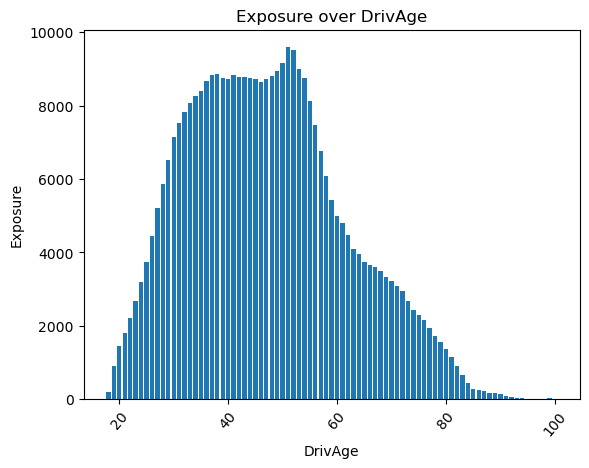

In [6]:
plotExpo(data,'DrivAge')

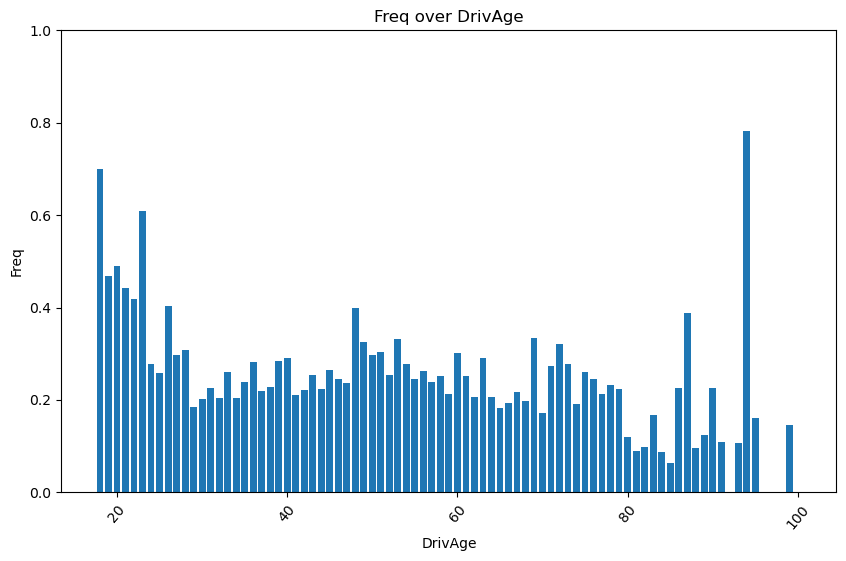

In [7]:
plotFreq(data,'DrivAge',1)

Younger and older drivers have a higher frequency.

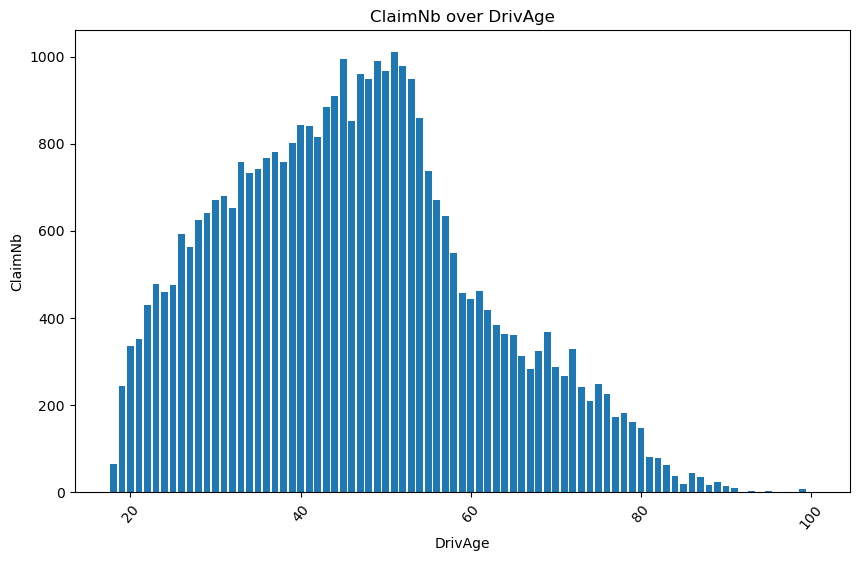

In [8]:
plotNb(data,'DrivAge')

Most claims happen on driver between age 20 to 70.

### Vehicle Power

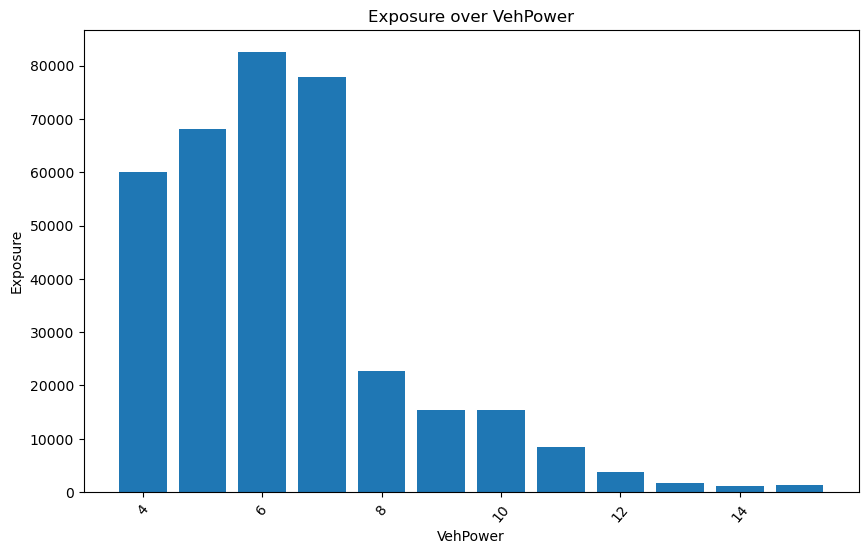

In [36]:
plotExpo(data,'VehPower')

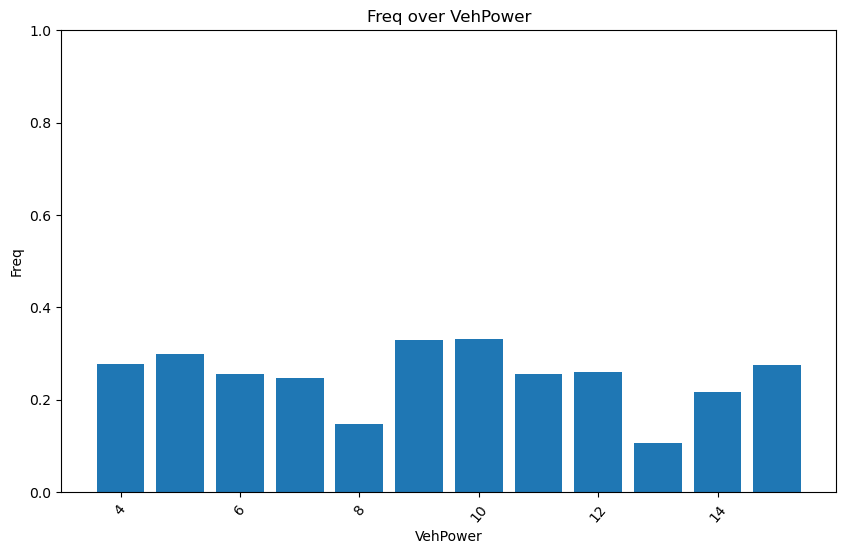

In [10]:
plotFreq(data,'VehPower',1)

Frequency among vehicle power does not show any trends.

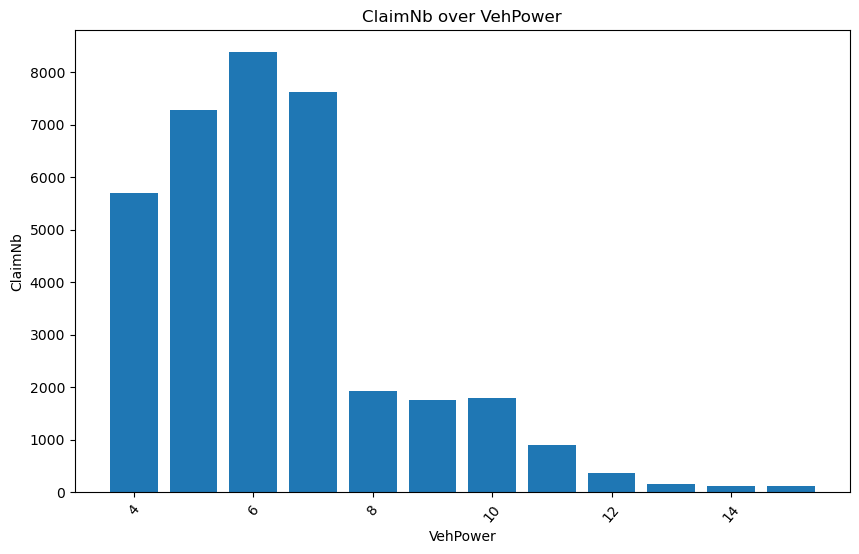

In [11]:
plotNb(data,'VehPower')

The distribution of Vehpower is mainly depend on the number of cars with lower power are much larger than those with higher power.

### Vehicle Age

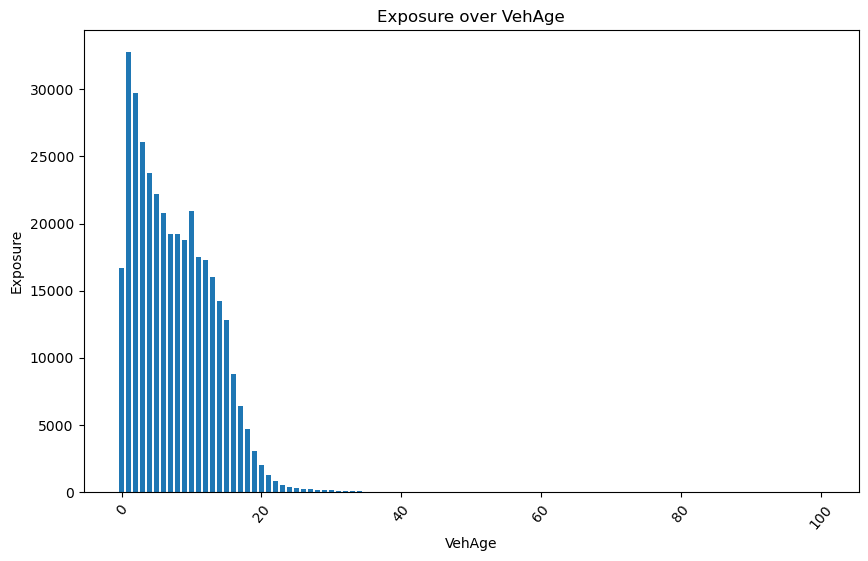

In [12]:
plotExpo(data,'VehAge')

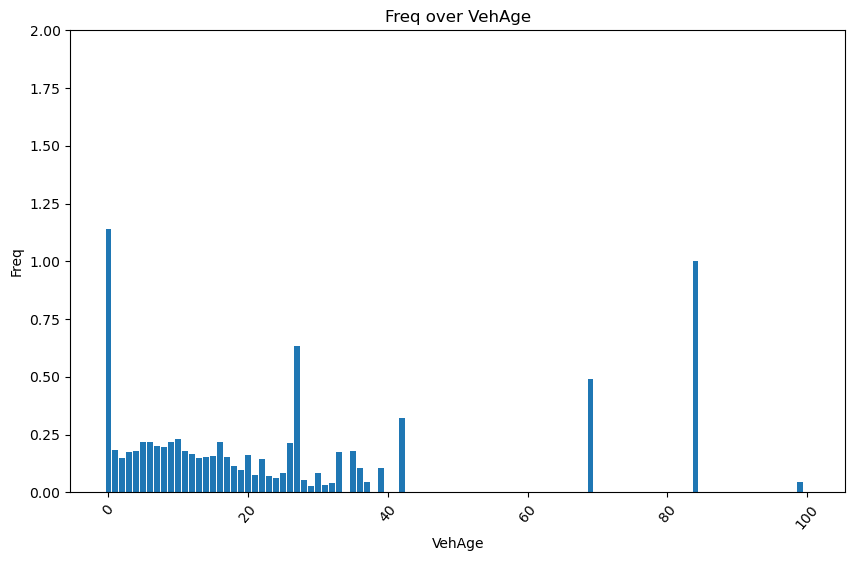

In [13]:
plotFreq(data,'VehAge',2)

Frequency is very high at Vehicle age 0, which means new car, may suggest new driver. Some very old vehicles also have high frequency.

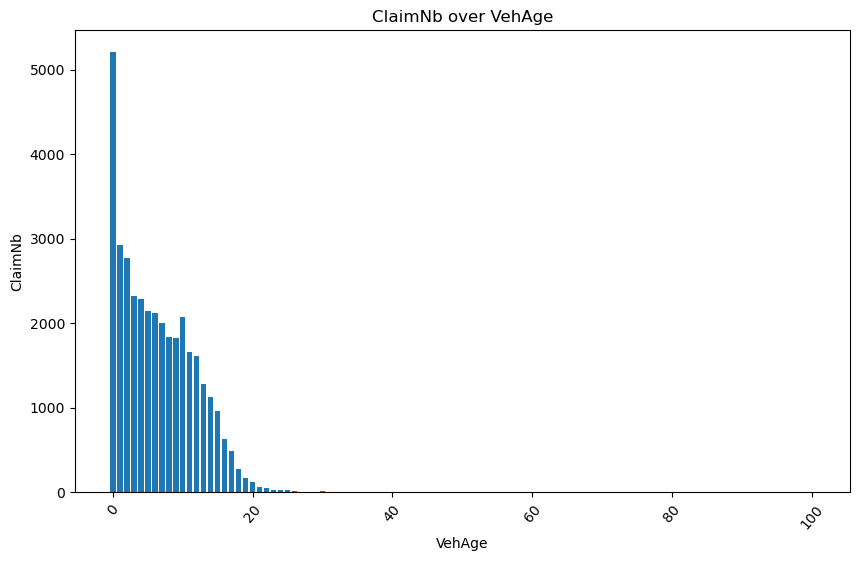

In [14]:
plotNb(data,'VehAge')

Most claim happens at age 0.

### Bonus Malus

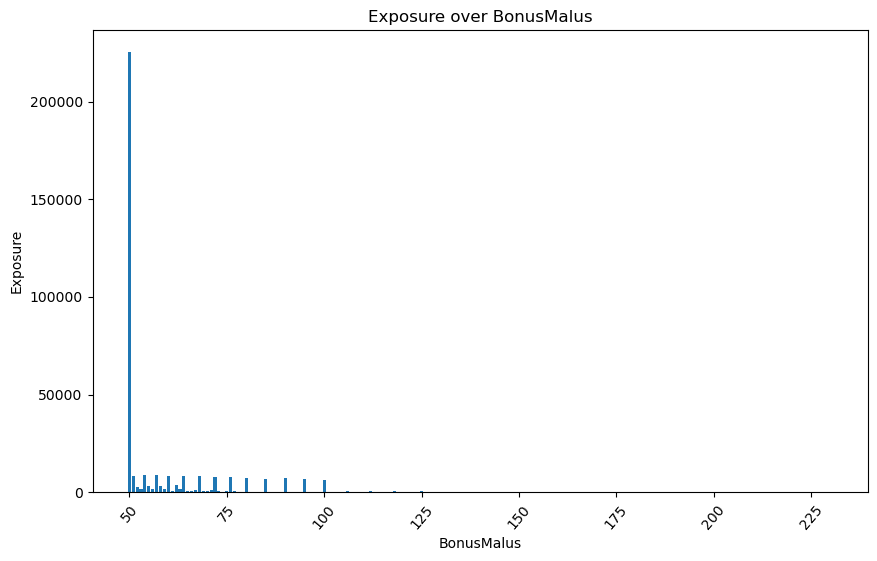

In [15]:
plotExpo(data,'BonusMalus')

A Large amount of data has a default Bonus Malus of 50.

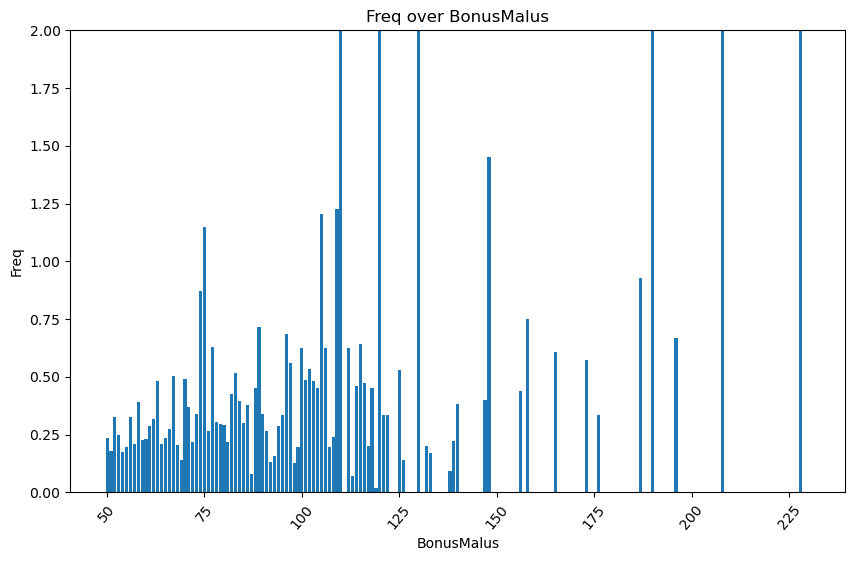

In [16]:
plotFreq(data,'BonusMalus',2)

Frequency is high for high BM values.

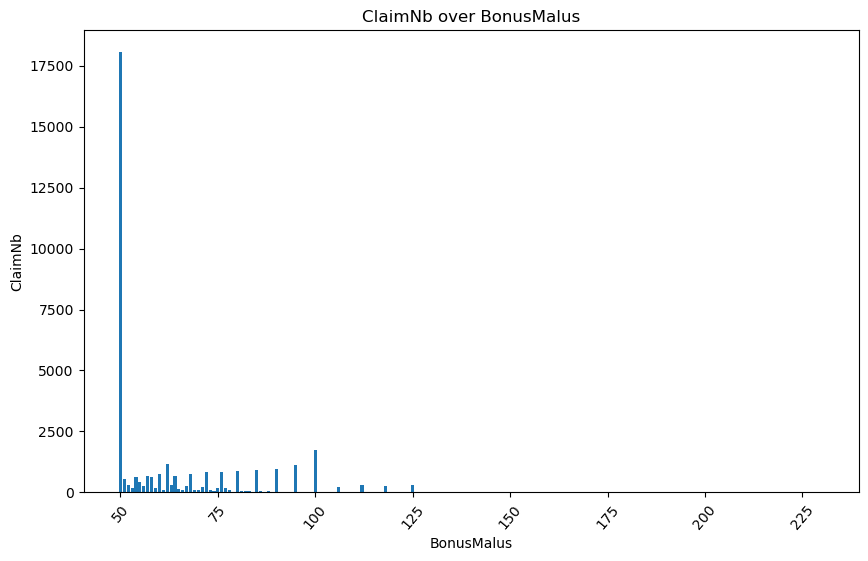

In [17]:
plotNb(data,'BonusMalus')

### Density


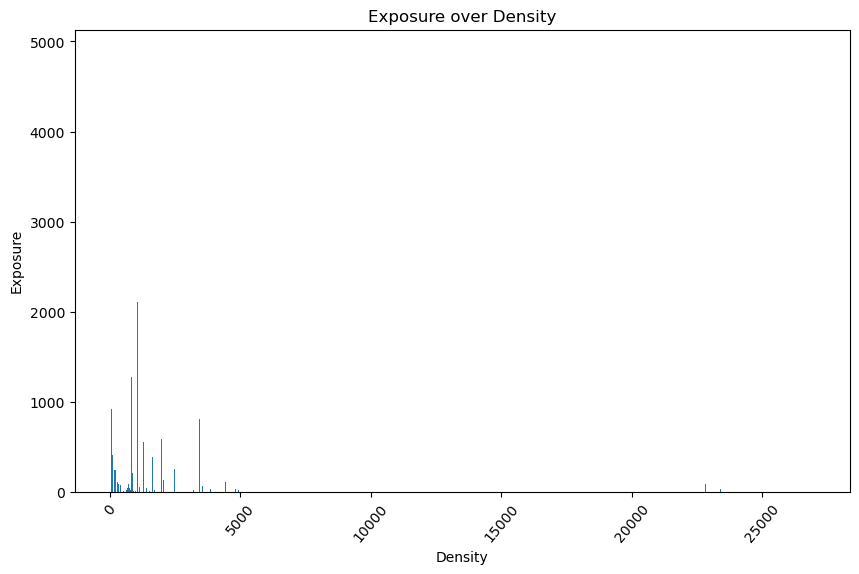

In [18]:
plotExpo(data,'Density')

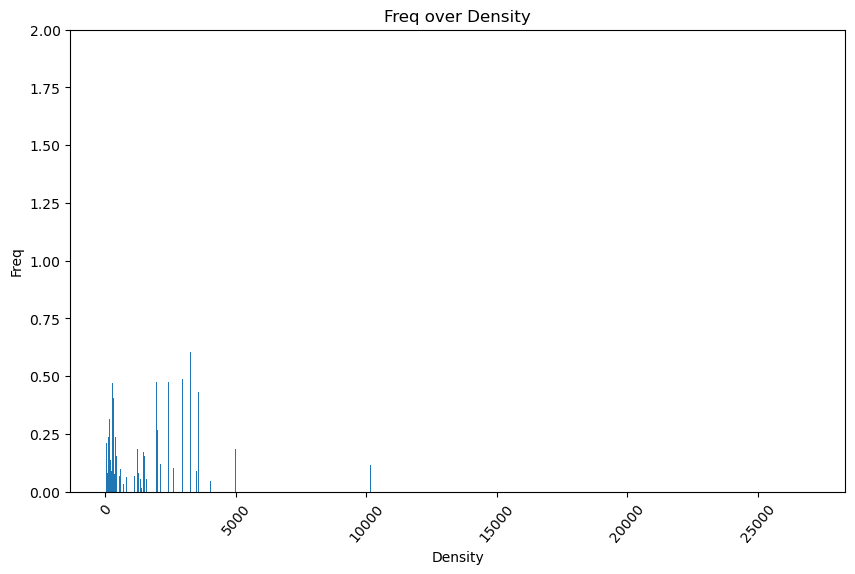

In [19]:
plotFreq(data,'Density',2)

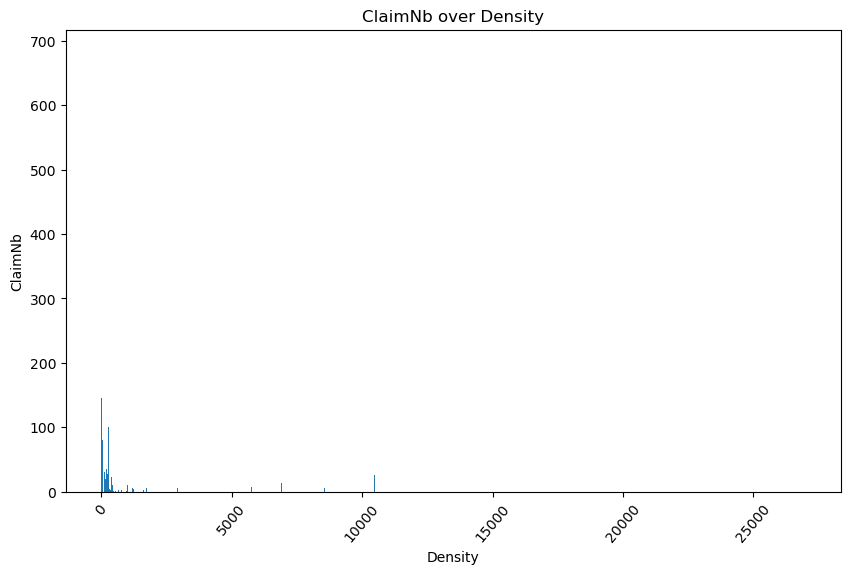

In [20]:
plotNb(data,'Density')

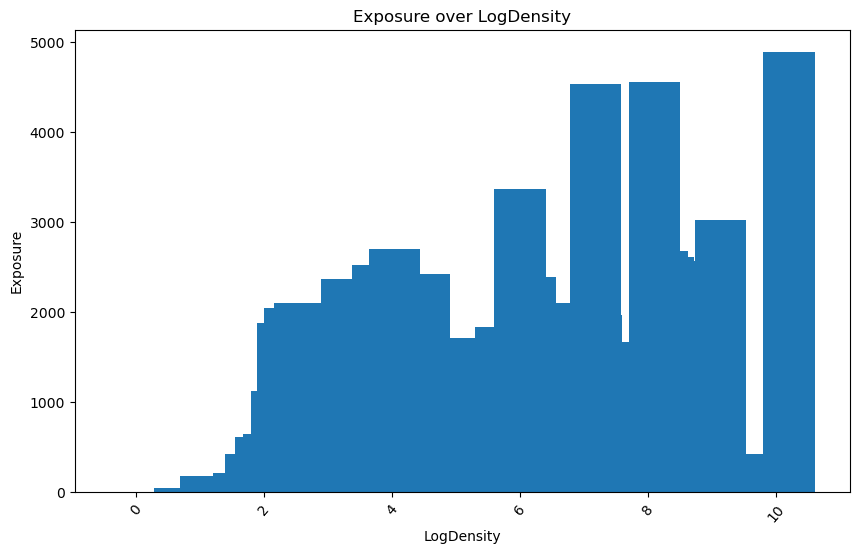

In [21]:
plotExpo(data,'LogDensity')

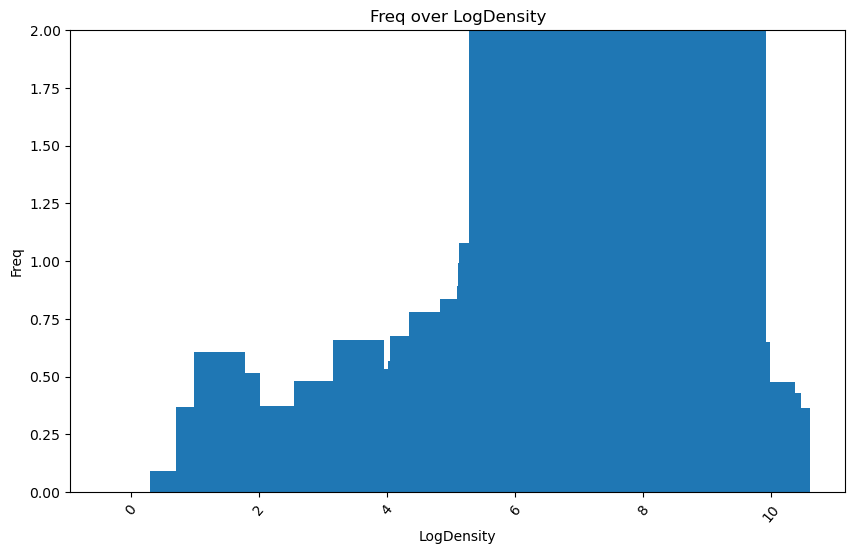

In [22]:
plotFreq(data,'LogDensity',2)

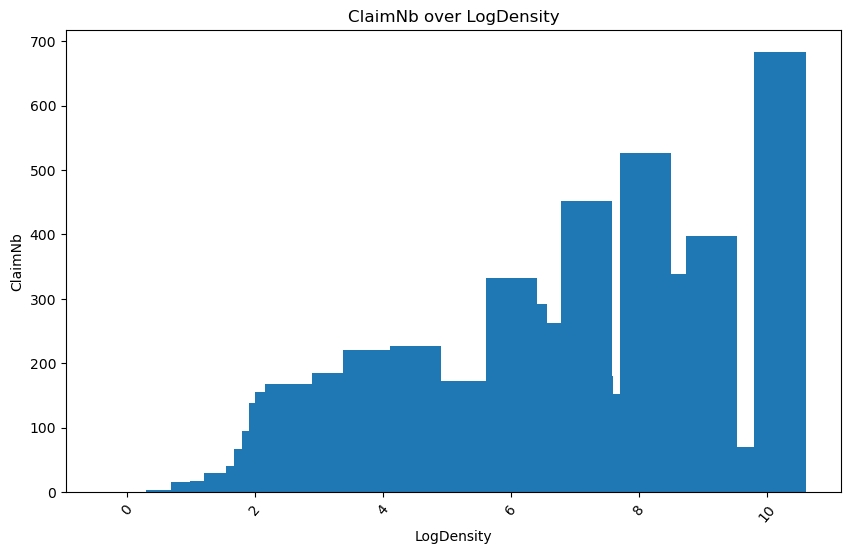

In [23]:
plotNb(data,'LogDensity')

### Area

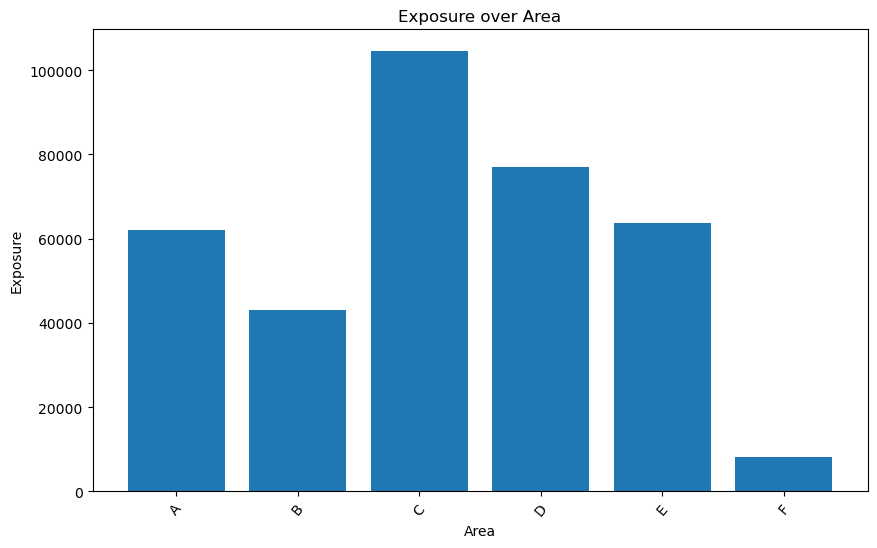

In [24]:
plotExpo(data,'Area')

Area F has significantly low exposure.

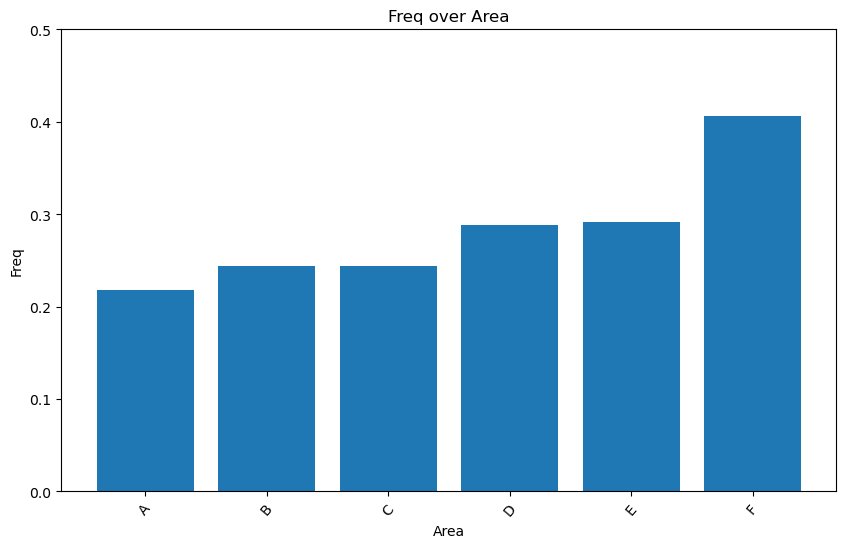

In [25]:
plotFreq(data,'Area',0.5)

F is possible to be a very dangerous area.

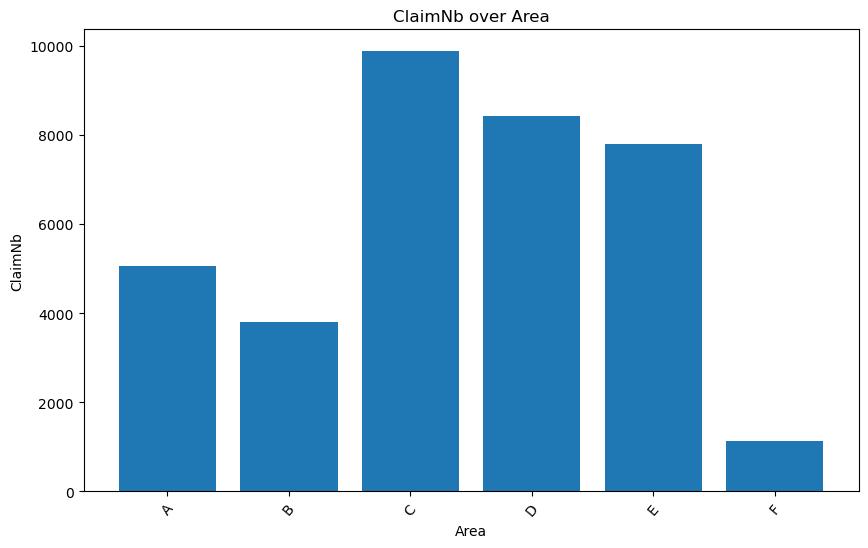

In [26]:
plotNb(data,'Area')

### Vehicle Brand

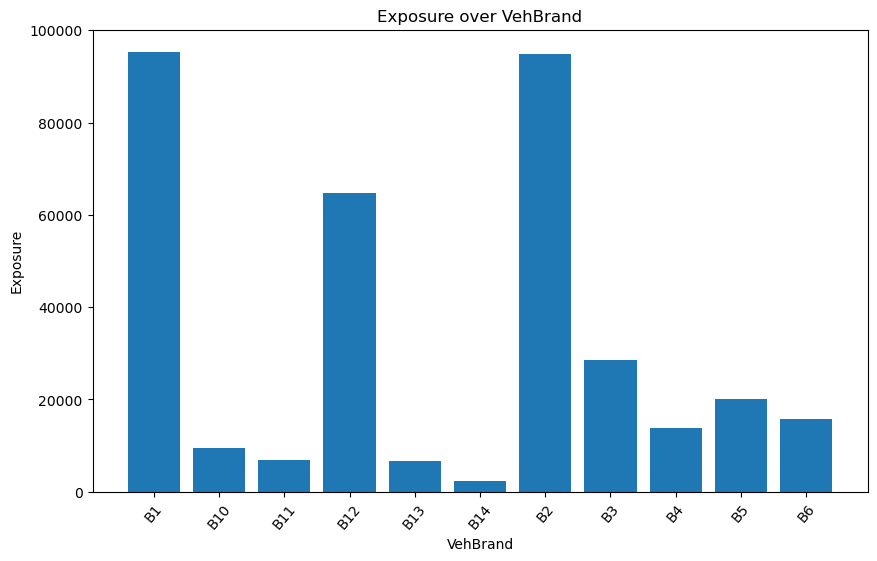

In [27]:
plotExpo(data,'VehBrand')

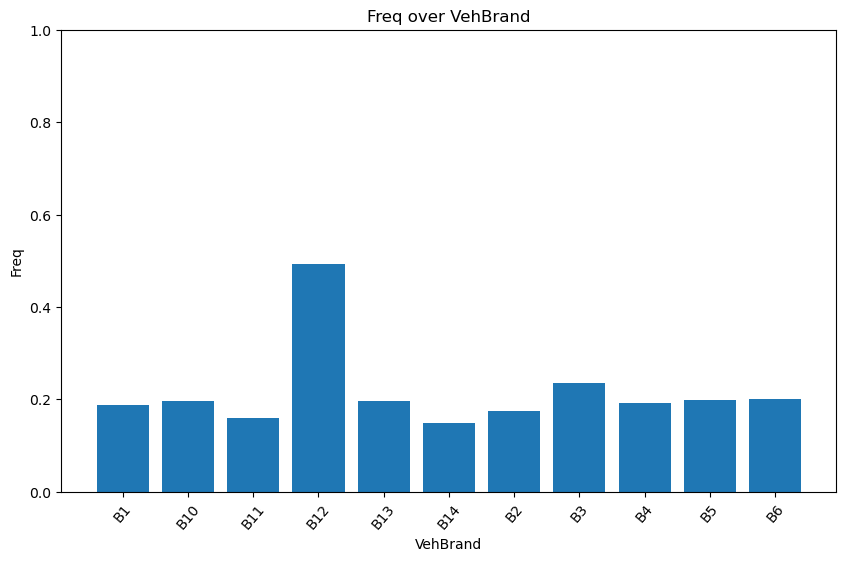

In [28]:
plotFreq(data,'VehBrand',1)

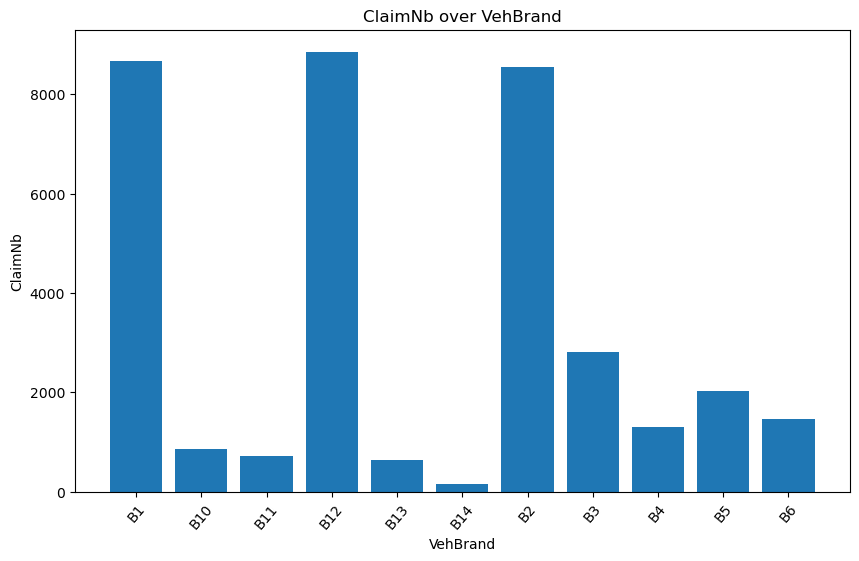

In [29]:
plotNb(data,'VehBrand')

### Vehicle Gas

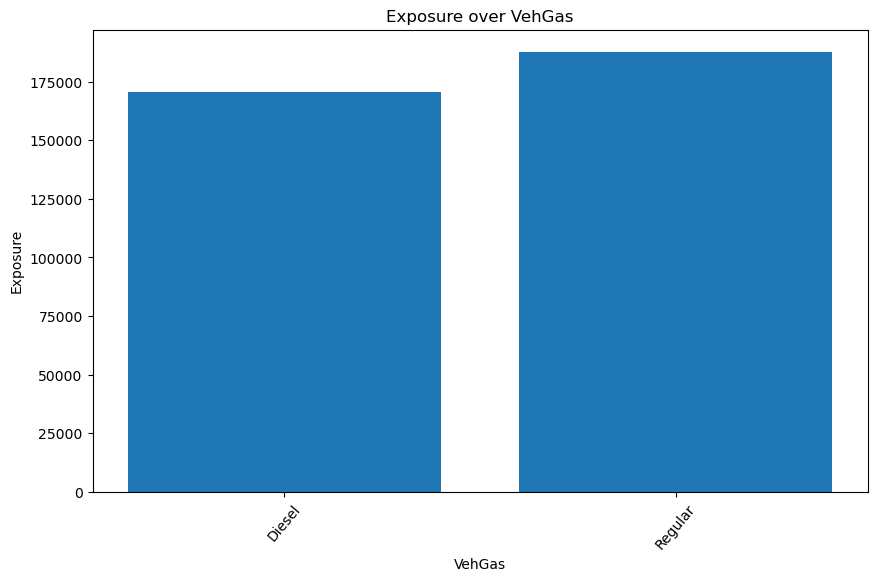

In [30]:
plotExpo(data,'VehGas')

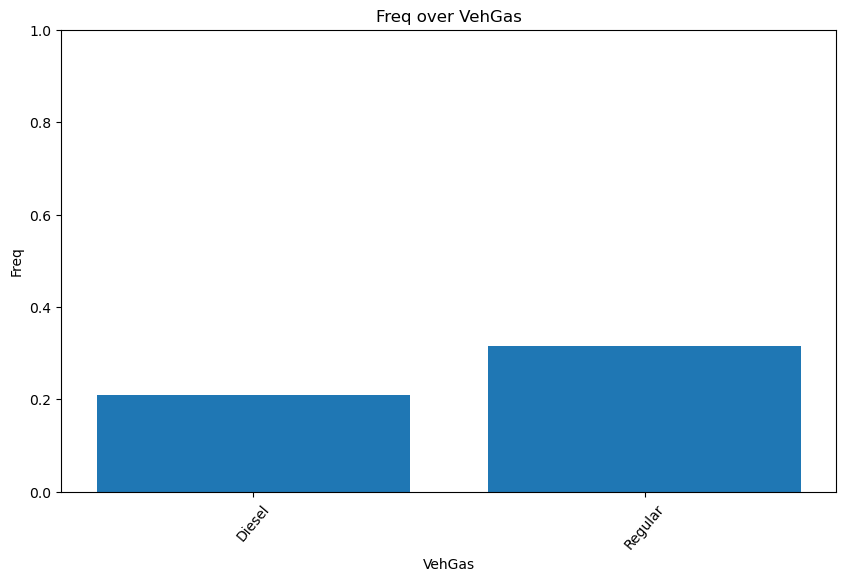

In [31]:
plotFreq(data,'VehGas',1)

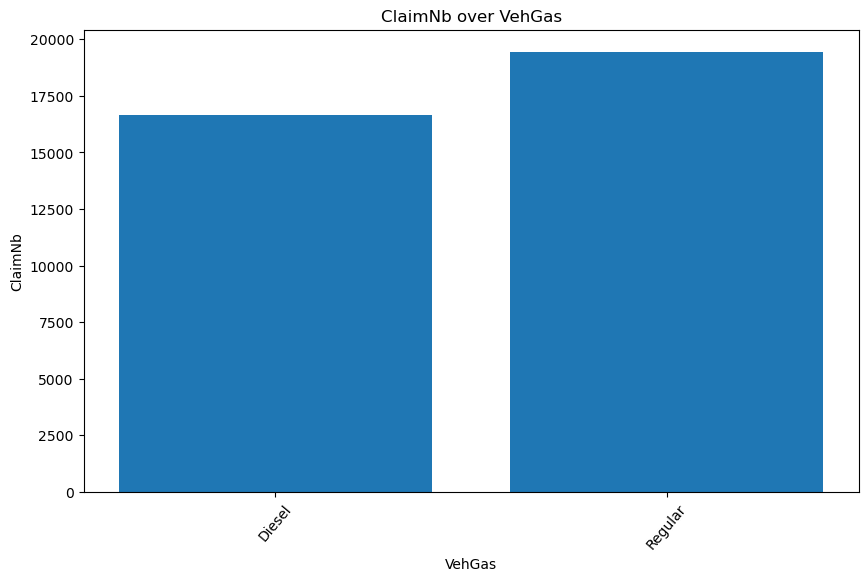

In [32]:
plotNb(data,'VehGas')

### Region

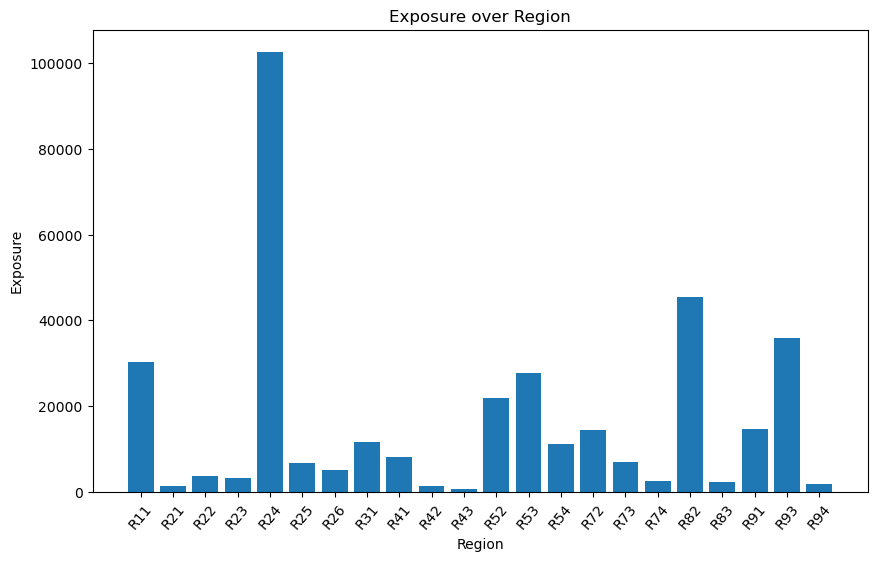

In [33]:
plotExpo(data,'Region')

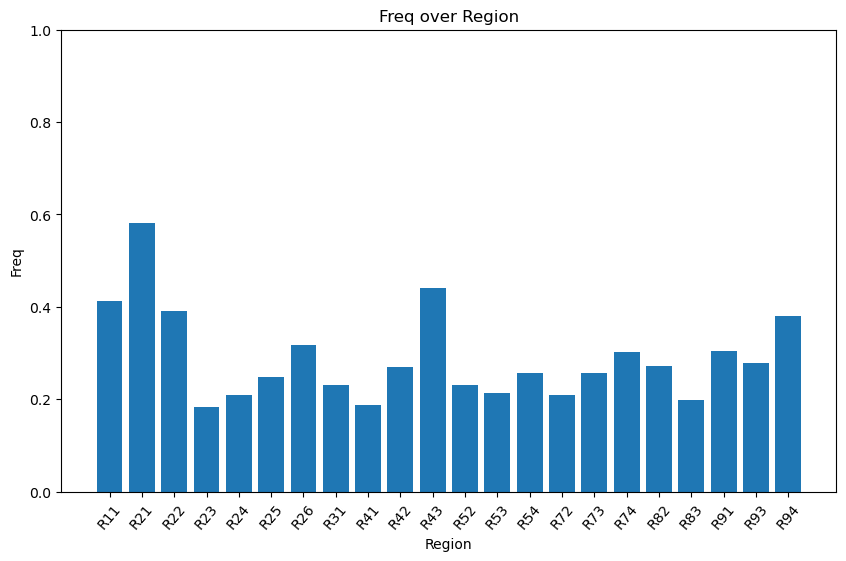

In [34]:
plotFreq(data,'Region',1)

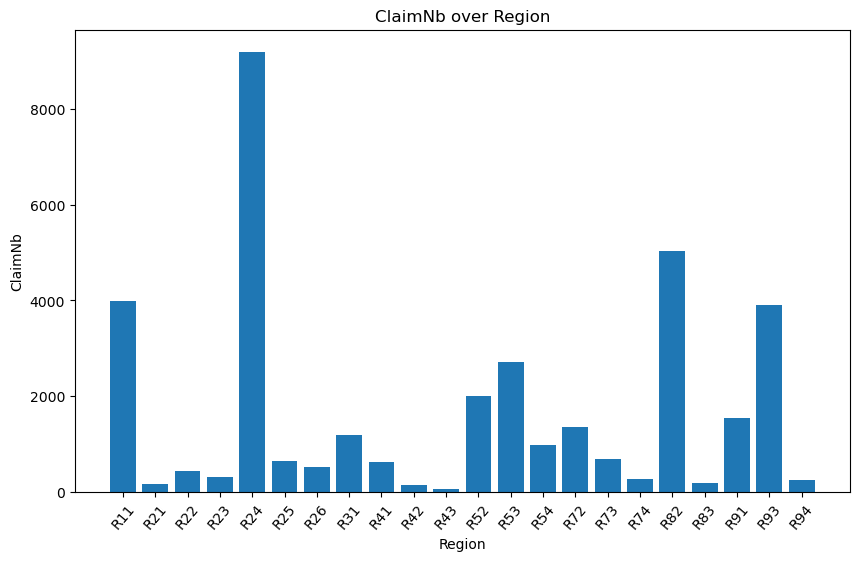

In [35]:
plotNb(data,'Region')

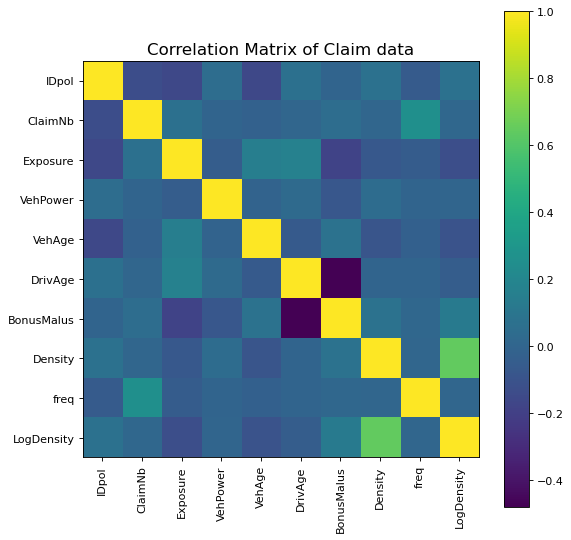

In [50]:
df = data.select_dtypes(include =[np.number])
corr = df.corr()
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='r')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title('Correlation Matrix of Claim data', fontsize=15)
plt.show()